In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

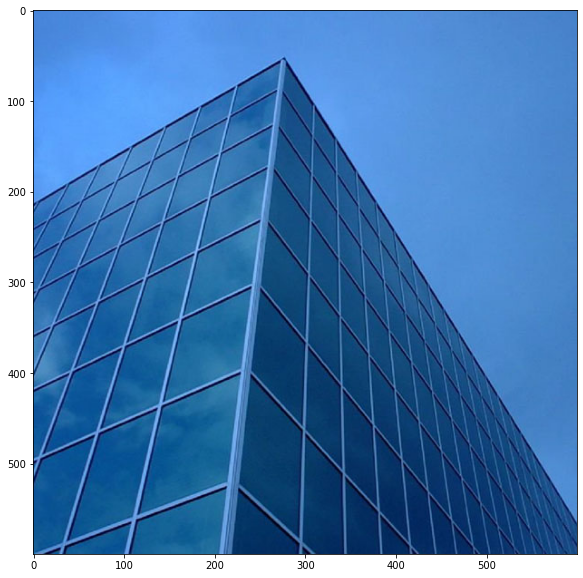

In [2]:
building = cv2.imread('Files/Building.jpg')
plt.figure(figsize=(25, 10))
plt.imshow(building[:,:,::-1]);

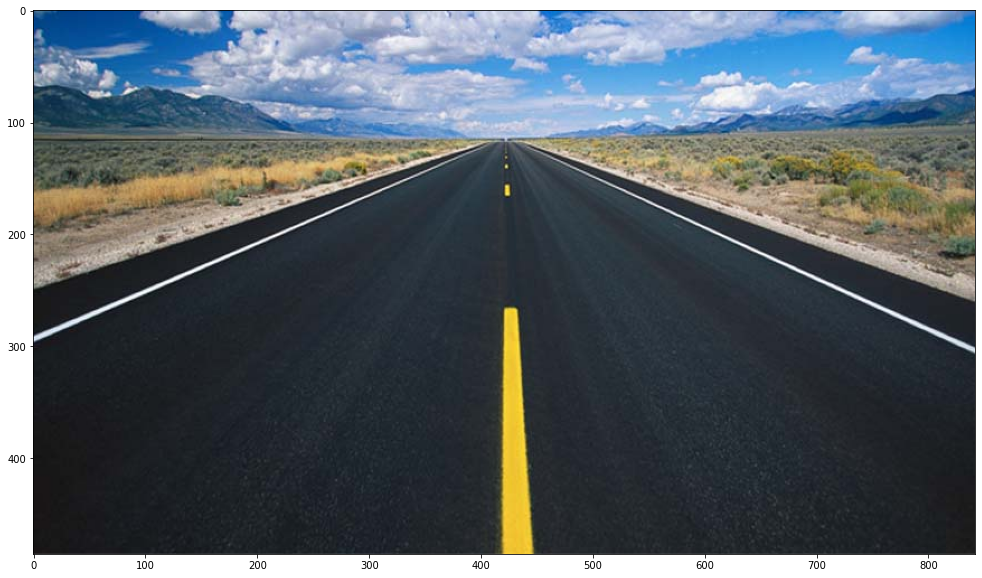

In [3]:
road = cv2.imread('Files/Road.jpg')
plt.figure(figsize=(25, 10))
plt.imshow(road[:,:,::-1]);

In [4]:
building_gray = cv2.cvtColor(building, cv2.COLOR_BGR2GRAY)
road_gray = cv2.cvtColor(road, cv2.COLOR_BGR2GRAY)

In [5]:
# filtering
# blur = cv2.GaussianBlur(building_gray, (9, 9), 0)
bilateral = cv2.bilateralFilter(building_gray,3,75,75)
# Detect Edges
edges = cv2.Canny(bilateral, 50, 150)
# Get Lines
# lines = cv2.HoughLines(edges, 1, np.pi/180, 300)
linesP = cv2.HoughLinesP(edges, 1, np.pi/180, 50, None, 50, 10)

In [6]:
linesP

array([[[265, 117, 589, 598]],

       [[306, 181, 538, 526]],

       [[335, 141, 599, 563]],

       [[293, 119, 587, 572]],

       [[110, 574, 203, 171]],

       [[326, 164, 546, 503]],

       [[ 32, 599, 162, 174]],

       [[205, 598, 248, 247]],

       [[304, 227, 563, 596]],

       [[254, 226, 534, 597]],

       [[245, 298, 451, 552]],

       [[270,  79, 599, 586]],

       [[277,  52, 316, 114]],

       [[297, 467, 305, 210]],

       [[216, 538, 275,  52]],

       [[ 49, 551, 165, 172]],

       [[405, 296, 442, 599]],

       [[ 29, 596, 122, 293]],

       [[267, 125, 539, 529]],

       [[259, 164, 407, 375]],

       [[ 55, 375, 117, 206]],

       [[237, 338, 272,  56]],

       [[ 18, 205, 279,  54]],

       [[  0, 507,  19, 457]],

       [[207, 158, 225,  82]],

       [[338, 353, 340, 492]],

       [[259, 237, 428, 461]],

       [[  0, 274, 271, 124]],

       [[342, 438, 344, 523]],

       [[490, 535, 537, 598]],

       [[219, 599, 255, 260]],

       [

In [7]:
def nothing(x):
    pass

In [9]:
cv2.namedWindow('Hough', cv2.WINDOW_NORMAL)

cv2.createTrackbar('hough_threshold', 'Hough', 0, 500, nothing)
cv2.createTrackbar('hough_minlength', 'Hough', 0, 50, nothing)
cv2.createTrackbar('hough_gap', 'Hough', 0, 50, nothing)

while 1:
    image = building.copy()
    x = cv2.getTrackbarPos('hough_threshold','Hough')
    y = cv2.getTrackbarPos('hough_minlength','Hough')
    z = cv2.getTrackbarPos('hough_gap','Hough')
    # Get Lines
    linesP = cv2.HoughLinesP(edges, 1, np.pi/180, x, None, y, z)
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(image, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
    #edgesC = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    cv2.imshow('Hough', image)
    k = cv2.waitKey(1)
    if k == 27:
        break

cv2.destroyAllWindows()

In [10]:
cv2.namedWindow('Hough', cv2.WINDOW_NORMAL)

cv2.createTrackbar('chose_image', 'Hough', 0, 1, nothing)
cv2.createTrackbar('canny_minthreshold', 'Hough', 0, 250, nothing)
cv2.createTrackbar('hough_threshold', 'Hough', 0, 300, nothing)
cv2.createTrackbar('hough_minlength', 'Hough', 0, 50, nothing)
cv2.createTrackbar('hough_gap', 'Hough', 0, 50, nothing)

while 1:
    #image = road.copy()
    chose_image = cv2.getTrackbarPos('chose_image','Hough')
    canny_thr = cv2.getTrackbarPos('canny_minthreshold','Hough')
    x = cv2.getTrackbarPos('hough_threshold','Hough')
    y = cv2.getTrackbarPos('hough_minlength','Hough')
    z = cv2.getTrackbarPos('hough_gap','Hough')
    if chose_image == 0:
        image = building.copy()
        gray = building_gray
    elif chose_image == 1:
        image = road.copy()
        gray = road_gray
    
    # filtering
    bilateral = cv2.bilateralFilter(gray,3,75,75)
    # Detect Edges
    edges = cv2.Canny(bilateral, canny_thr, canny_thr*3, 3)
    # Get Lines
    linesP = cv2.HoughLinesP(edges, 1, np.pi/180, x, None, y, z)
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(image, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
#     edgesC = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
#     image = cv2.addWeighted(image, 0.9, edgesC, 0.5, 0)
    cv2.imshow('Hough', image)
    k = cv2.waitKey(1)
    if k == 27:
        break
    elif k == ord('s'):
        if chose_image == 0:
            cv2.imwrite(f"Files/building_edges.jpg",image)
        elif chose_image == 1:
            cv2.imwrite(f"Files/road_edges.jpg",image)

cv2.destroyAllWindows()